# **Importing Necessary Libraries**

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
from utils.utils import load_json, write_json
from utils.similarity_score import cosine, match, manhattan_distance, inverse_manhattan_distance

In [246]:
songs = load_json('data/vector_data.json')

In [260]:
users = load_json('data/selected_users.json')

# **Creating the Similarity Function**

In [86]:
function_map = {
    'in_movie': match,
    'lyrics': cosine,
    'language': cosine,
    'topics': cosine,
    'sentiment': cosine,
    'artist': match,
    'album_type': match,
    'album_name': match,
    'album_artist': match,
    'popularity': inverse_manhattan_distance,
    'age': inverse_manhattan_distance,
    'explicit': match,
    'duration': inverse_manhattan_distance,
    'listener_play_ratio': manhattan_distance,
    'genre': cosine,
    'acousticness': manhattan_distance,
    'danceability': manhattan_distance,
    'energy': manhattan_distance,
    'instrumentalness': manhattan_distance,
    'key': match,
    'liveness': manhattan_distance,
    'loudness': inverse_manhattan_distance,
    'mode': match,
    'speechiness': manhattan_distance,
    'tempo': inverse_manhattan_distance,
    'valence': manhattan_distance,
    'num_sections': cosine,
    'num_segments': cosine,
    'artist_vector': cosine
}

In [111]:
scale = {
    'tempo': 100,
    'loudness': 10,
    'duration': 1e5,
    'age': 25,
    'popularity': 100,
}

In [184]:
feature_weights = {
    'in_movie': 0.1,
    'lyrics': 0.5,
    'language': 0.8,
    'topics': 0.6,
    'sentiment': 0.8,
    'artist': 0,
    'album_type': 0.1,
    'album_artist': 0.2,
    'popularity': 0.2,
    'age': 0.4,
    'explicit': 0.1,
    'duration': 0.3,
    'listener_play_ratio': 0.4,
    'genre': 0.7,
    'acousticness': 0.5,
    'danceability': 0.5,
    'energy': 0.5,
    'instrumentalness': 0.2,
    'key': 0.2,
    'liveness': 0.2,
    'loudness': 0.5,
    'mode': 0.1,
    'speechiness': 0.2,
    'tempo': 0.6,
    'valence': 0.5,
    'num_sections': 0.2,
    'num_segments': 0.2,
    'artist_vector': 0.7,
    'album_name': 0.1,
}


In [197]:
def similarity(song1, song2, verbose=False):
    global function_map, scale, feature_weights
    scores = []
    features = set(song1.keys()).intersection(song2.keys())
    features.remove('id')
    features.remove('title')

    weights = {k: feature_weights[k] for k in features}

    if 'album_type' in features:
        if song1['album_type'] == 0 or song2['album_type'] == 0:
            weights['artist_vector'] += weights['album_artist']
            weights['album_name'] = 0
            weights['album_artist'] = 0
    
    for feature in features:
        func = function_map[feature]

        if isinstance(song1[feature], list):
            if song1[feature] == [0] * len(song1[feature]):
                del weights[feature]
                continue
        
        if isinstance(song2[feature], list):
            if song2[feature] == [0] * len(song2[feature]):
                del weights[feature]
                continue

        if str(song1[feature]) == 'nan' or str(song2[feature]) == 'nan':
            del weights[feature]
            continue

        if feature in scale:
            score = func(song1[feature], song2[feature], scale=scale[feature])
        else:
            score = func(song1[feature], song2[feature])

        score = score * weights[feature]
        
        if verbose:
            print(f'{feature}: {score}')
        
        scores.append(score)

    scale_factor = sum(list(weights.values()))
    
    return sum(scores) / scale_factor

In [173]:
for i in range(len(songs)):
    if songs[i]['artist'] == 'Alan Walker':
        print(i)

1966
3207
3920
5157
5551
5951
6829
7085
8964
10784
11750


In [199]:
similarity(songs[1966], songs[3920], verbose=True)

popularity: 0.12658227848101264
album_name: 0
genre: 0.6876339407468565
in_movie: 0.1
album_type: 0.1
artist: 0
explicit: 0.1
age: 0.37037037037037035
duration: 0.19867549668874174
artist_vector: 0.7999999999999999
album_artist: 0.0
listener_play_ratio: 0.375904763545557


0.9223118870427544

In [175]:
feat = 'listener_play_ratio'

songs[1966][feat], songs[3207][feat]

(0.1170976564065723, 0.249634562286828)

# **Using the User Data**

In [125]:
def find_song(id):
    s = None
    for song in songs:
        if song['id'] == id:
            s = song
            break
    
    return s

### **Finding Similarity on Last Song**

In [187]:
res = []

for user in users:
    main = find_song(user['SongIDs'][-1])
    userid = user['UserID']
    songids = user['SongIDs'][:-1]

    if main is None:
        continue
    
    arr = []
    for id in songids:
        song = find_song(id)

        if song is None:
            continue

        sim = similarity(main, song)
        arr.append(sim)

    if len(arr) == 0:
        continue

    avg = sum(arr) / len(arr)

    res.append({'userid': userid, 'avg_similarity': avg})

    print(f'User {userid} avg similarity: {avg}')

User 730 avg similarity: 0.7132425812568542
User 1038 avg similarity: 0.6470503102281183
User 1132 avg similarity: 0.691883500231268
User 1829 avg similarity: 0.7284584504826815
User 1854 avg similarity: 0.6485068402373406
User 1855 avg similarity: 0.9018039142872585
User 1856 avg similarity: 0.9018039142872585
User 2386 avg similarity: 0.7792750434982222
User 2459 avg similarity: 0.6143761374051876
User 2460 avg similarity: 0.6143761374051876
User 2916 avg similarity: 0.7893666283244785
User 3132 avg similarity: 0.6557286519939356
User 3133 avg similarity: 0.7651862893201199
User 3861 avg similarity: 0.7623465979595334
User 4045 avg similarity: 0.7255826317085843
User 4434 avg similarity: 0.7470098038331124
User 4614 avg similarity: 0.875958115050451
User 4783 avg similarity: 0.6603664189908174
User 5106 avg similarity: 0.6549745223154377
User 5178 avg similarity: 0.7423590753416767
User 5285 avg similarity: 0.8128944111628454
User 5501 avg similarity: 0.7135286276353233
User 5550 avg

### **Finding Similarity on Random Songs**

In [262]:
res = []

for user in users:
    try:
        num = random.randint(0, len(user['SongIDs']) - 1)
        main = find_song(user['SongIDs'][num])
    except:
        num = -1
        main = find_song(user['SongIDs'][num])

    userid = user['UserID']
    songids = user['SongIDs']
    songids.pop(num)

    if main is None:
        continue
    
    arr = []
    for id in songids:
        song = find_song(id)

        if song is None:
            continue

        sim = similarity(main, song)
        arr.append(sim)

    if len(arr) == 0:
        continue

    avg = sum(arr) / len(arr)

    res.append({'userid': userid, 'avg_similarity': avg})

    print(f'User {userid} avg similarity: {avg}')

User 730 avg similarity: 0.7001939911233872
User 857 avg similarity: 0.6535786097204122
User 1187 avg similarity: 0.680567564574987
User 1192 avg similarity: 0.6156334499841737
User 1855 avg similarity: 0.9018039142872585
User 1856 avg similarity: 0.93417732500637
User 2133 avg similarity: 0.7333409603569301
User 2459 avg similarity: 0.679576921561308
User 2679 avg similarity: 0.5855463273420795
User 2916 avg similarity: 0.7905206434726169
User 2949 avg similarity: 0.7648911353015012
User 3133 avg similarity: 0.7993307872252687
User 3182 avg similarity: 0.693537964798586
User 3690 avg similarity: 0.8556909618601628
User 3861 avg similarity: 0.8151232972571142
User 3985 avg similarity: 0.7488820717353056
User 4045 avg similarity: 0.7757072980543251
User 4312 avg similarity: 0.6832493118785438
User 4434 avg similarity: 0.6589675791979982
User 4614 avg similarity: 0.8701700892673268
User 4783 avg similarity: 0.6625748422164267
User 5106 avg similarity: 0.7090167021072609
User 5178 avg sim

c:\Users\vansh\Desktop\Projects\Song Recommendation System\utils\similarity_score.py:6: RuntimeWarning: invalid value encountered in scalar divide
  score = np.dot(v1, v2) / (norm(v1) * norm(v2))


User 6547 avg similarity: 0.7387990983327792
User 6929 avg similarity: 0.6669180625783663
User 7208 avg similarity: 0.7920396662399088
User 9208 avg similarity: 0.7954065437329294
User 1687 avg similarity: 0.7380443207635401
User 2774 avg similarity: 0.6756746230521214
User 3095 avg similarity: 0.645980775592391
User 4171 avg similarity: 0.6089472424094147
User 4955 avg similarity: 0.8339430267435199
User 5989 avg similarity: 0.761421538870437
User 6743 avg similarity: 0.6880427870972285
User 9063 avg similarity: 0.8016585317725757
User 9321 avg similarity: 0.7469066566392668
User 9834 avg similarity: 0.8215868660900835
User 31 avg similarity: 0.6846488527661723
User 1783 avg similarity: 0.6990071133395876
User 2225 avg similarity: 0.7734500135357562
User 2374 avg similarity: 0.660566224705679
User 9193 avg similarity: 0.8298381512263989
User 9414 avg similarity: 0.6683780703394363
User 1377 avg similarity: 0.7394303116048825
User 1642 avg similarity: 0.6977729364622168
User 4944 avg s

In [264]:
points = []

for j in range(1, 10):
    count = 0
    for i in res:
        if i['avg_similarity'] > j/10:
            count += 1

    acc = count / len(res) * 100
    points.append(acc)

points

[99.86979166666666,
 99.86979166666666,
 99.86979166666666,
 99.86979166666666,
 99.67447916666666,
 94.7265625,
 57.6171875,
 15.8203125,
 1.171875]

Text(0, 0.5, 'Accuracy')

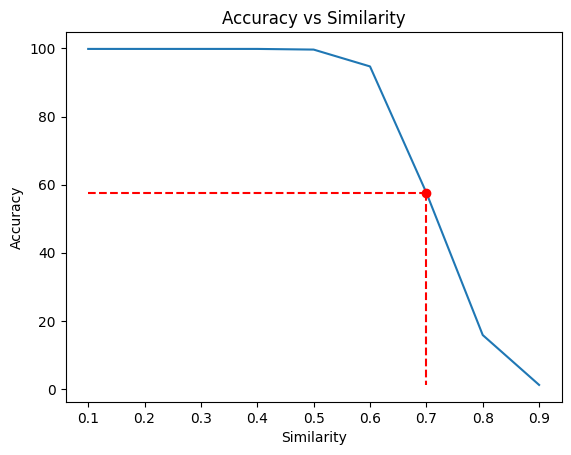

In [265]:
plt.plot([i/10 for i in range(1, 10)], points)
plt.plot([0.7]*(len(points[6:])), points[6:], color='red', linestyle='dashed')
plt.plot([0.7], [points[6]], 'ro')
plt.plot([i/10 for i in range(1, 8)], [points[6]]*7, color='red', linestyle='dashed')

plt.title('Accuracy vs Similarity')
plt.xlabel('Similarity')
plt.ylabel('Accuracy')